In [3]:
import pandas as pd

df = pd.read_excel("../data/Online Retail.xlsx", sheet_name="Online Retail")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Calculate the amount column

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [5]:
df.drop(columns=["StockCode", "Description", "Quantity", "UnitPrice", "CustomerID", "Country"], inplace=True)

df

,InvoiceNo,InvoiceDate,TotalPrice
0,536365,2010-12-01 08:26:00,15.30
1,536365,2010-12-01 08:26:00,20.34
2,536365,2010-12-01 08:26:00,22.00
3,536365,2010-12-01 08:26:00,20.34
4,536365,2010-12-01 08:26:00,20.34
...,...,...,...
541904,581587,2011-12-09 12:50:00,10.20
541905,581587,2011-12-09 12:50:00,12.60
541906,581587,2011-12-09 12:50:00,16.60
541907,581587,2011-12-09 12:50:00,16.60


In [6]:
# Filter negative invoices (they are not sales)
df = df[df["TotalPrice"]>=0]

df

,InvoiceNo,InvoiceDate,TotalPrice
0,536365,2010-12-01 08:26:00,15.30
1,536365,2010-12-01 08:26:00,20.34
2,536365,2010-12-01 08:26:00,22.00
3,536365,2010-12-01 08:26:00,20.34
4,536365,2010-12-01 08:26:00,20.34
...,...,...,...
541904,581587,2011-12-09 12:50:00,10.20
541905,581587,2011-12-09 12:50:00,12.60
541906,581587,2011-12-09 12:50:00,16.60
541907,581587,2011-12-09 12:50:00,16.60


In [7]:
invoice_dates = df.groupby(["InvoiceNo"])[["InvoiceDate"]].agg("first")

invoice_dates

,InvoiceDate
InvoiceNo,
536365,2010-12-01 08:26:00
536366,2010-12-01 08:28:00
536367,2010-12-01 08:34:00
536368,2010-12-01 08:34:00
536369,2010-12-01 08:35:00
...,...
581584,2011-12-09 12:25:00
581585,2011-12-09 12:31:00
581586,2011-12-09 12:49:00


In [8]:
invoice_amounts = df.groupby(["InvoiceNo"])[["TotalPrice"]].agg("sum")

invoice_amounts

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
581584,140.64
581585,329.05
581586,339.20


In [9]:
timeseries_invoices = pd.concat([invoice_amounts, invoice_dates], axis=1, join="inner")

timeseries_invoices

,TotalPrice,InvoiceDate
InvoiceNo,,
536365,139.12,2010-12-01 08:26:00
536366,22.20,2010-12-01 08:28:00
536367,278.73,2010-12-01 08:34:00
536368,70.05,2010-12-01 08:34:00
536369,17.85,2010-12-01 08:35:00
...,...,...
581584,140.64,2011-12-09 12:25:00
581585,329.05,2011-12-09 12:31:00
581586,339.20,2011-12-09 12:49:00


In [10]:
daily_sales = timeseries_invoices.groupby([timeseries_invoices['InvoiceDate'].dt.date]).sum()

daily_sales

,TotalPrice
InvoiceDate,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-05,31774.95
2010-12-06,54830.46
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


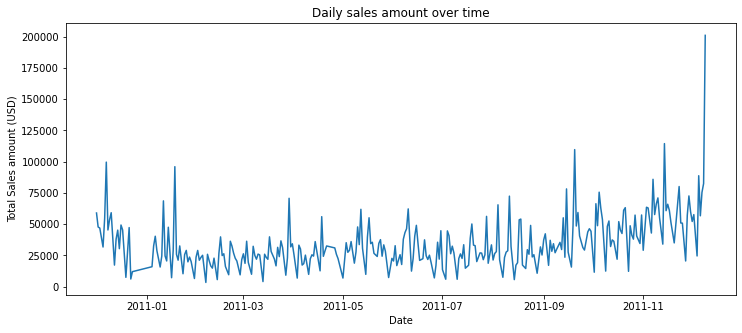

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily sales amount over time")
plt.ylabel("Total Sales amount (USD)")
plt.xlabel("Date")
plt.show()

In [12]:
!pip install statsmodels

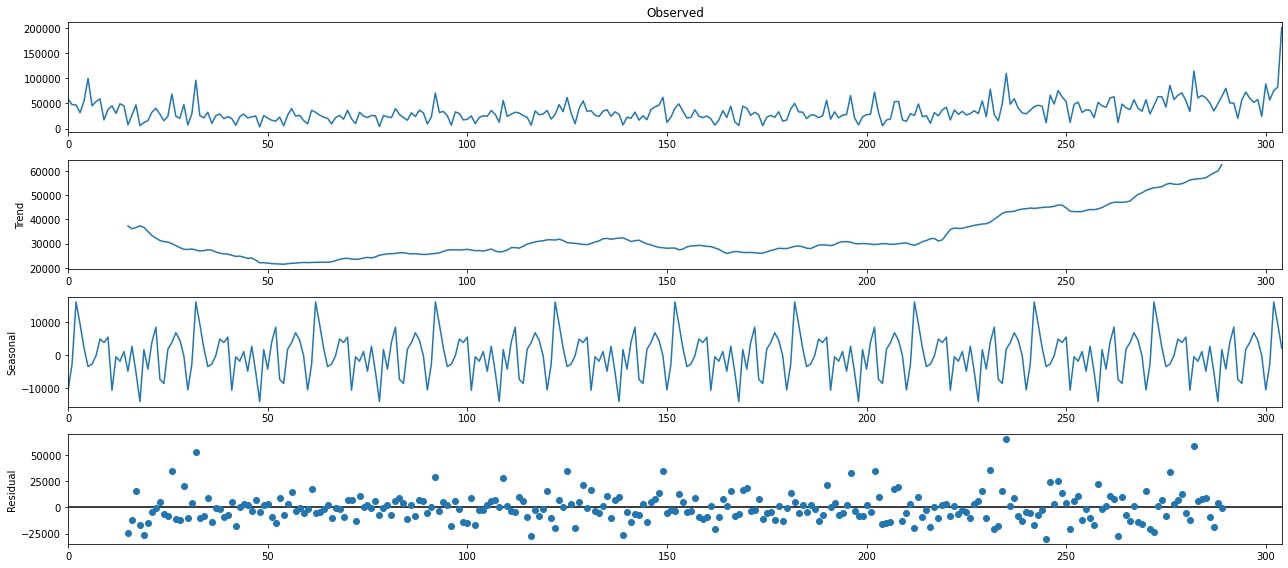

In [13]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(daily_sales.values, model='additive', period=30)
fig = decomposition.plot()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


# Train and evaluate the model
def evaluate_arima_model(X, arima_order, sarima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.80)
	train, test = X[0:train_size], X[train_size:]

	model = ARIMA(train, order=arima_order, seasonal_order=sarima_order)
	model_fit = model.fit()
	predictions = model_fit.get_prediction(start=len(train), end=len(X)-1).predicted_mean
	error = mean_squared_error(test, predictions)
	return error


In [24]:
import itertools

p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_order = pdq[0]
best_seasonal_order = seasonal_pdq[0]
best_error = 1e9

# Perform Grid Search here
for order in pdq:
    for seasonal_order in seasonal_pdq:
        error = evaluate_arima_model(daily_sales.values, order, seasonal_order)
        if error < best_error:
            best_error = error
            best_order = order
            best_seasonal_order = seasonal_order

print(f"Best order : {best_order}")
print(f"Best seasonal order : {best_seasonal_order}")


Best order : (1, 1, 1)
Best seasonal order : (0, 1, 1, 12)


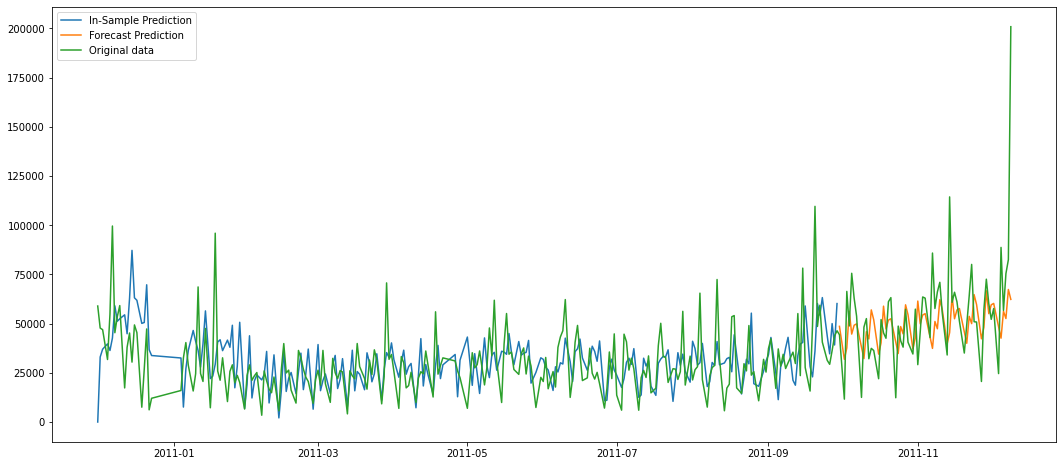

In [27]:
# Use the best model to visualize forecasting
train_size = int(len(daily_sales) * 0.80)
train, test = daily_sales.values[0:train_size], daily_sales.values[train_size:]
mod = ARIMA(train, order=best_order, seasonal_order=best_seasonal_order)
res = mod.fit()
#res.summary()

predictions = res.get_prediction(start=0, end=len(daily_sales)-1)
plt.plot(daily_sales.index[0:train_size], predictions.predicted_mean[0:train_size], label="In-Sample Prediction")
plt.plot(daily_sales.index[train_size:], predictions.predicted_mean[train_size:], label="Forecast Prediction")
plt.plot(daily_sales.index,  daily_sales.values, label="Original data")
plt.legend()
plt.show()  